### **Dataset visullization (showed in the paper))**

In [1]:
import os
import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from glob import glob
import pandas as pd
from pyrsimg import readTiff, imgShow, coor2coor


In [2]:
truths_ls = sorted(glob(config.dir_landsat+'/truth/*')) 
scenes_ls = [truth.replace('/truth/', '/scene/').split('_truth')[0] + '.tif' for truth in truths_ls]
scenes_s2 = sorted(glob(config.dir_s2 + '/scene/*')) 
truths_s2 = [scene.replace('/scene/', '/truth/').replace('_6Bands', '').split('.')[0] + '_truth.tif' for scene in scenes_s2]
print('Number of landsat scenes:', len(scenes_ls))
print('Number of sentinel-2 scenes:', len(scenes_s2))


Number of landsat scenes: 43
Number of sentinel-2 scenes: 95


In [3]:
scenes_name = []
lons_center, lats_center = [], []
imgs_size = []
for path in scenes_ls+scenes_s2:
  img = readTiff(path)
  scene_name = os.path.basename(path).split('.')[0]
  img_ins = readTiff(path) 
  extent, epsg_img = img_ins.geoextent, img_ins.epsg_code
  center = (np.mean(extent[0:2]), np.mean(extent[2:4]))
  lon_center, lat_center = coor2coor(srs_from=epsg_img, srs_to=4326, x=center[0], y=center[1])
  scenes_name.append(scene_name); lons_center.append(lon_center); lats_center.append(lat_center)
  imgs_size.append((img.row, img.col))

scenes_type = [scene_name[0:2].lower() for scene_name in scenes_name] 
df_fp = pd.DataFrame({'scene_name': scenes_name, \
                    'center_lat': lats_center,
                    'center_lon': lons_center,
                    'img_size': imgs_size,
                    'scene_type': scenes_type,
                    })           ## scene id
df_fp.head()


,scene_name,center_lat,center_lon,img_size,scene_type
0,l5_scene_01,-29.095085,119.570329,"(1249, 1326)",l5
1,l5_scene_02,59.880447,66.381719,"(1253, 1329)",l5
2,l5_scene_03,46.045379,61.774053,"(1319, 1439)",l5
3,l5_scene_04,63.950327,125.442036,"(1161, 1252)",l5
4,l5_scene_05,22.580164,113.915133,"(1058, 1222)",l5


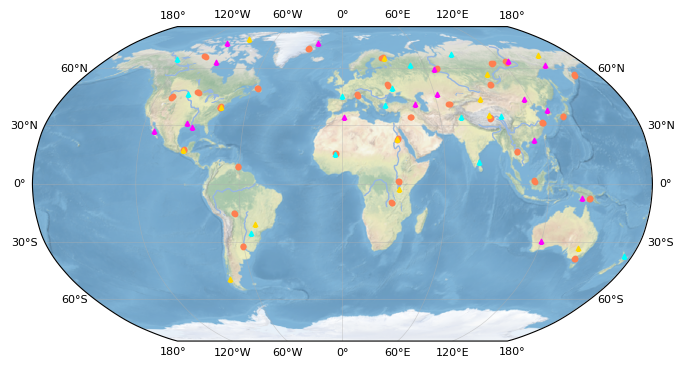

In [4]:
plt.rcParams.update({'font.size': 8})
fig = plt.figure(figsize=(8, 8))
# ax = plt.axes(projection=ccrs.PlateCarree())  #
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))  #
### Base map
ax.set_global()
ax.stock_img()
# ax.coastlines(lw=0.5) # 
ax.add_feature(cfeature.RIVERS, lw = 1) #
ax.add_feature(cfeature.LAKES) #
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
### Footprint.
ids_s2, ids_l5, ids_l7, ids_l8 = df_fp['scene_type']=='s2', df_fp['scene_type']=='l5', \
                            df_fp['scene_type']=='l7', df_fp['scene_type']=='l8' 

ax.scatter(x=df_fp['center_lon'][ids_s2].values, y=df_fp['center_lat'][ids_s2].values, color='Coral', \
                        marker='o', s=10, alpha=1, transform=ccrs.PlateCarree(), zorder=2)
ax.scatter(x=df_fp['center_lon'][ids_l5].values, y=df_fp['center_lat'][ids_l5].values, color='Fuchsia', \
                        marker='^', s=10, alpha=1, transform=ccrs.PlateCarree(), zorder=2)
ax.scatter(x=df_fp['center_lon'][ids_l7].values, y=df_fp['center_lat'][ids_l7].values, color='Gold', \
                        marker='^', s=10, alpha=1, transform=ccrs.PlateCarree(), zorder=2)
ax.scatter(x=df_fp['center_lon'][ids_l8].values, y=df_fp['center_lat'][ids_l8].values, color='Aqua', \
                        marker='^', s=10, alpha=1, transform=ccrs.PlateCarree(), zorder=2)



### Sentinel-2 image

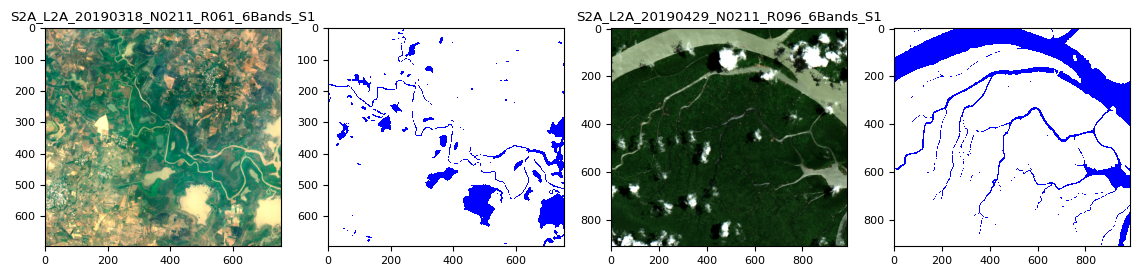

In [5]:
### Check the Landsat scene and the truth
ids_s2 = [9, 15]
scene_s2_1, truth_s2_1 = readTiff(scenes_s2[ids_s2[0]]), readTiff(truths_s2[ids_s2[0]])
scene_s2_2, truth_s2_2 = readTiff(scenes_s2[ids_s2[1]]), readTiff(truths_s2[ids_s2[1]])
colors = ['white', 'blue']
cmap = mpl.colors.ListedColormap(colors)
fig, ax = plt.subplots(1, 4, figsize=(14,4))
imgShow(img=scene_s2_1.array, ax=ax[0])
ax[0].set_title(os.path.basename(scenes_s2[ids_s2[0]]).split('.')[0])
ax[1].imshow(truth_s2_1.array, cmap=cmap)
imgShow(img=scene_s2_2.array, ax=ax[2])
ax[2].set_title(os.path.basename(scenes_s2[ids_s2[1]]).split('.')[0])
ax[3].imshow(truth_s2_2.array, cmap=cmap)



### Landsat image

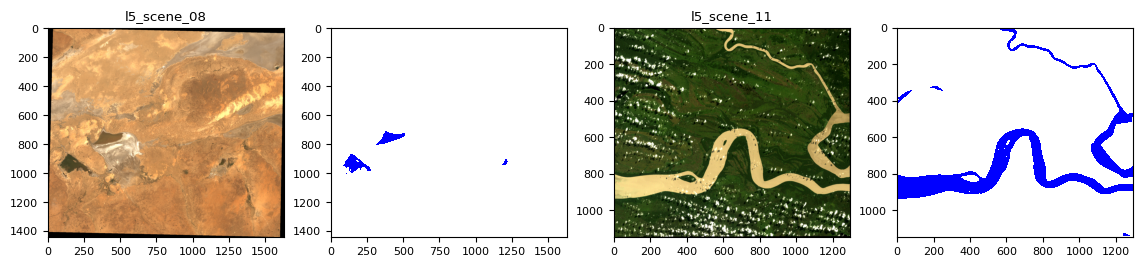

In [6]:
ids_ls = [7, 10]
scene_ls_1, truth_ls_1 = readTiff(scenes_ls[ids_ls[0]]), readTiff(truths_ls[ids_ls[0]])
scene_ls_2, truth_ls_2 = readTiff(scenes_ls[ids_ls[1]]), readTiff(truths_ls[ids_ls[1]])
fig, ax = plt.subplots(1, 4, figsize=(14,4))
imgShow(img=scene_ls_1.array, ax=ax[0])
ax[0].set_title(os.path.basename(scenes_ls[ids_ls[0]]).split('.')[0])
ax[1].imshow(truth_ls_1.array, cmap=cmap)
imgShow(img=scene_ls_2.array, ax=ax[2])
ax[2].set_title(os.path.basename(scenes_ls[ids_ls[1]]).split('.')[0])
ax[3].imshow(truth_ls_2.array, cmap=cmap)

